In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bikes=pd.read_csv('../train.csv', index_col='datetime',parse_dates=True)

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bikes.rename(columns={'count':'total'},inplace=1)

(array([   69.,   648.,  1440.,  1891.,  1587.,  1753.,  1901.,  1194.,
          355.,    48.]),
 array([  0.82 ,   4.838,   8.856,  12.874,  16.892,  20.91 ,  24.928,
         28.946,  32.964,  36.982,  41.   ]),
 <a list of 10 Patch objects>)

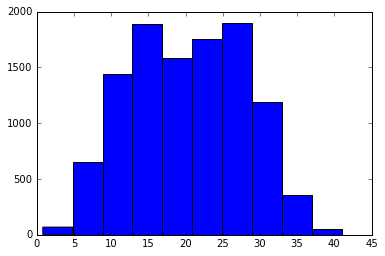

In [8]:
plt.hist(bikes['temp'])

In [9]:
bikes['hour']=bikes.index.hour
bikes['temp_cut']=pd.cut(bikes.temp,[0,15,30,41])

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

[<matplotlib.text.Text at 0x118132518>, <matplotlib.text.Text at 0x117cc8400>]

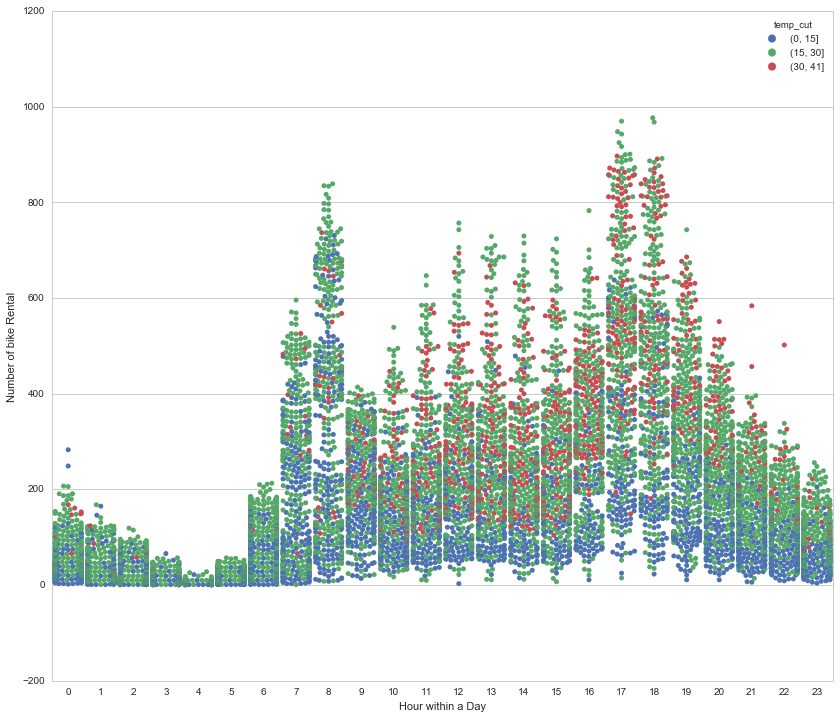

In [23]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='hour',y='total',hue='temp_cut',data=bikes)
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

In [21]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
pred = pd.read_csv('pred.csv')

In [27]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [28]:
pred.head(2)

,datetime,count
0,2011-01-20 00:00:00,15.558
1,2011-01-20 01:00:00,6.042


In [49]:
testcount = test.merge(pred, left_on='datetime', right_on='datetime', how = 'inner')

In [57]:
testcount.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'], dtype=object)

In [67]:
traintrim = train.drop(['casual','registered'],axis=1)

In [68]:
traintrim.columns.values

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'], dtype=object)

In [70]:
data=traintrim.append(testcount)

In [86]:
data['month'] = pd.DatetimeIndex(data.datetime).month
data['day'] = pd.DatetimeIndex(data.datetime).dayofweek
data['hour'] = pd.DatetimeIndex(data.datetime).hour
data['dayofm'] = pd.DatetimeIndex(data.datetime).day

[<matplotlib.text.Text at 0x1168664e0>, <matplotlib.text.Text at 0x11adf9e10>]

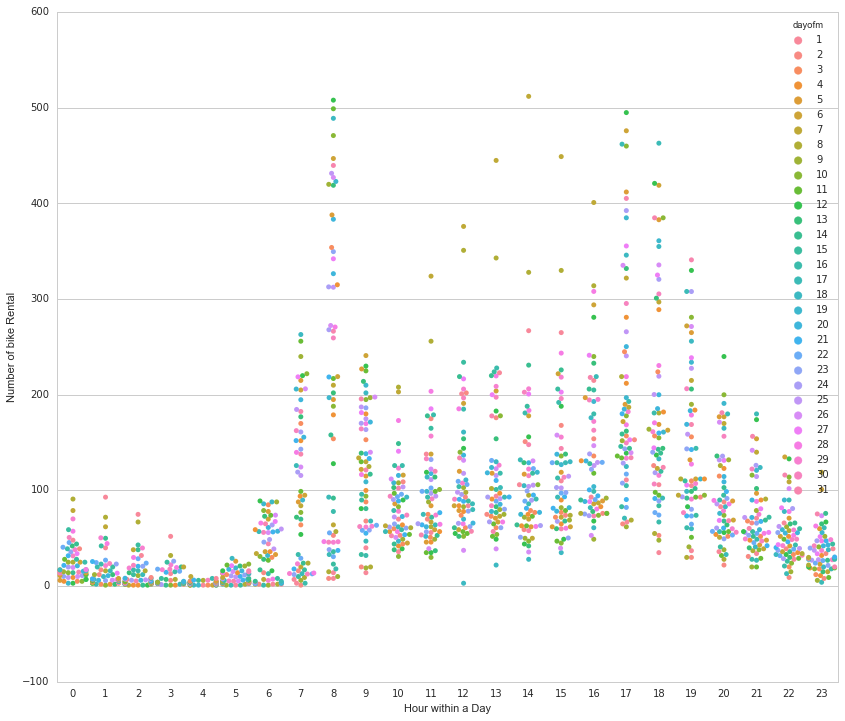

In [88]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='hour',y='count',hue='dayofm',data=data[data.month == 1])
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

In [4]:
err2 = pd.read_csv('error2.txt')

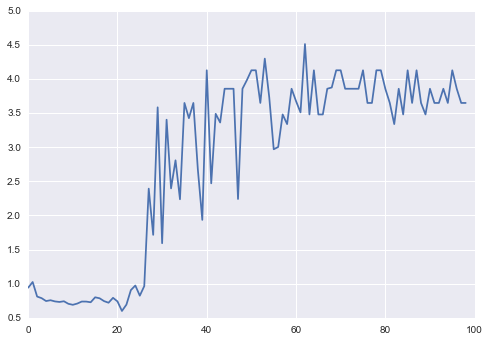

In [7]:
plt.plot(err2)

In [10]:
err2.min()

error 2    0.600133
dtype: float64

In [12]:
error1 = pd.read_csv('resultsANN.txt')

CParserError: Error tokenizing data. C error: Expected 2 fields in line 124, saw 5
